In [ ]:
'''
In this notebook we're simply going to assume a function, then sample few points from it, then discard the function parameters. Then will try to find the parameters back from sampled points. In the process will try to learn error surfaces and how a simple gradient descent works.

We will take a random sigmoid function. f(x) = 1/(1+e^(-1*(wx+b)))
let w = 1.0, b = 1.5
'''

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [107]:
# Lets first plot our sigmoid function
def custom_sigmoid(x, w, b):
    exp = -(w*x+b)
    denominator = 1 + math.exp(exp)
    return math.pow(denominator, -1)

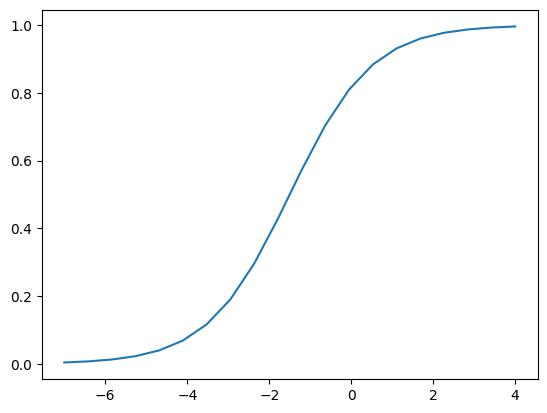

In [108]:
w = 1.0; b = 1.5
start = -7; stop = 3
x = [float(i) for i in np.linspace(start, stop+1, 20)]
y = []
for i in x:
    y.append(custom_sigmoid(i, w, b))

plt.plot(x, y)

In [109]:
# Total 20 values. We will use these to plot the error surface and also learn w, b
print(x[0:5], y[0:5])

[-7.0, -6.421052631578947, -5.842105263157895, -5.2631578947368425, -4.684210526315789] [0.004070137715896128, 0.007238671173121007, 0.012842048111467693, 0.02268382960541429, 0.03976425127877638]


In [139]:
'''
we will assume that our function is sigmoid, and we want to find w, b. Also we will plot the
error surface for distinct values from 0 to 5 for both w, b. We will take intervals
of 0.5 to plot the error surface.

The loss function calculates loss at some data points x, y(which is in train data) for different w, b.

f_hat is the function we make with our w, b and will try to bring it as close to actual
f as possible
'''
def loss_fun(data, true_label, w, b):
    f_hat = custom_sigmoid(data, w, b)
    loss = (1/2)*math.pow(f_hat-true_label, 2)
    return loss

possible_ws = [float(i) for i in np.linspace(-20,20,80)]
possible_bs = [float(i) for i in np.linspace(-20,20,80)]

ws = []
bs = []
loss_error = []

for wi in possible_ws:
    for bi in possible_bs:
        total_loss = []
        for xi, yi in zip(x, y):
            point_loss = loss_fun(xi, yi, wi, bi)
            total_loss.append(point_loss)

        ws.append(wi)
        bs.append(bi)
        loss_error.append(float(np.mean(total_loss)))

print(len(ws), len(bs), len(loss_error))



6400 6400 6400


##### Plot the error surface

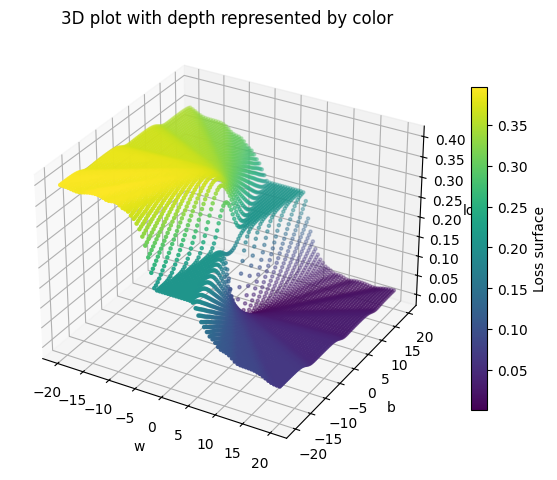

In [140]:
# The plotting code is taken from chatgpt
# 3D scatter plot with depth (z) represented by heatmap-like colors
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

# Plot
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Depth as color (uses matplotlib's default colormap)
sc = ax.scatter(ws, bs, loss_error, c=loss_error, s=5)

ax.set_title("3D plot with depth represented by color")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")

# Add a colorbar to show the depth-color mapping
fig.colorbar(sc, ax=ax, shrink=0.7, label="Loss surface")

plt.show()


In [141]:
# Create two interactive 3D Plotly figures and save them as standalone HTML files.
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

# === Figure 1: 3D Surface (z = sin(sqrt(x^2 + y^2))) ===
X = ws
Y = bs
Z = loss_error

fig = go.Figure(data=[go.Scatter3d(x=ws, y=bs, z=loss_error,
                                   mode='markers',
                                   marker=dict(
                                    size=2,                # smaller points
                                    color=loss_error,           # color by z values
                                    colorscale='Viridis',   # colormap
                                    showscale=True          # show colorbar
                       ))])
fig.update_layout(
    title="Interactive 3D error Surface",
    scene=dict(
        xaxis=dict(title="W", autorange=True),
        yaxis=dict(title="b", autorange=True),
        zaxis=dict(title="error", autorange=True)
    )
)
fig.show()

surface_path = "outputs/1_error_surface/1_error_surface.html"
pio.write_html(fig, file=surface_path, auto_open=False, include_plotlyjs="cdn")

surface_path
# You can open the interactive html file in browser

'outputs/1_error_surface/1_error_surface.html'

##### Gradient descent to learn the w, b

In [154]:
'''
We will use gradient descent to find the optimal w, b.
The loss function we chose, say it's f(w,b).
So if we want to find the direction in which to move, we need to know df/dw & df/db,
using which we can update the w & b to move in the direction to reduce the loss.
df/dw = (f-y)f(1-f)x (when i write f, i mean f(xi), & y means yi, and x is xi)
df/db is same except, it doesnt have last xi term

We will sum the gradients for all the points and take a mean of it and use it to
update our w, b
'''
def gradients(xi, yi, wi, bi):
    fi = custom_sigmoid(xi, wi, bi) # function value at xi
    partial_value = (fi - yi)*(fi)*(1-fi)
    dw = partial_value*xi
    db = partial_value
    return dw, db

eta = 1 # learning rate
w, b = 3.0, 1.0
n_iter = 1000


In [158]:
for i in range(n_iter):
    dw = 0
    db = 0
    loss = 0
    n = len(x)
    for xi, yi in zip(x,y):
        temp_dw, temp_db = gradients(xi, yi, w, b)
        dw += temp_dw
        db += temp_db

        loss += loss_fun(xi, yi, w, b)

    print(f"iter: {i}. w: {w}, b: {b}, Loss: {loss/n}")
    dw = dw/n
    db = db/n
    print(f"mean gradients w.r.t w: {dw}, b: {db}")
    w = w - eta*dw
    b = b - eta*db


iter: 0. w: 1.0002992967347601, b: 1.5006451393687537, Loss: 1.1067112607936933e-09
mean gradients w.r.t w: 1.3096103175688347e-06, b: 2.82259287067232e-06
iter: 1. w: 1.0002979871244426, b: 1.500642316775883, Loss: 1.0970503177550794e-09
mean gradients w.r.t w: 1.303883287972681e-06, b: 2.8102520248393225e-06
iter: 2. w: 1.0002966832411546, b: 1.500639506523858, Loss: 1.0874736717751023e-09
mean gradients w.r.t w: 1.298181274017368e-06, b: 2.7979650613087943e-06
iter: 3. w: 1.0002953850598806, b: 1.5006367085587966, Loss: 1.0779805878021412e-09
mean gradients w.r.t w: 1.292504166700716e-06, b: 2.785731745459208e-06
iter: 4. w: 1.0002940925557138, b: 1.500633922827051, Loss: 1.0685703371898338e-09
mean gradients w.r.t w: 1.286851857474192e-06, b: 2.773551843697257e-06
iter: 5. w: 1.0002928057038563, b: 1.5006311492752074, Loss: 1.0592421976368443e-09
mean gradients w.r.t w: 1.281224238269913e-06, b: 2.761425123432912e-06
iter: 6. w: 1.000291524479618, b: 1.500628387850084, Loss: 1.0499

Some thoughts. The error surface has a issue, it has flat surface and once the w, b are
stuck in that area than no matter how many iterations i run, since the grad is 0 on
flat surface, then no matter what I do we're stuck.

The doubt is, why are such error surfaces formed and how can we make sure (if its
even possible) that such surfaces are not formed. Can something be done about it?